 # Các thư viện sử dụng

In [2]:
import os
import numpy as np
import random
import matplotlib.pyplot as plt
import time
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import normalize
from scipy.spatial.distance import cdist
import tensorflow as tf
from sklearn.metrics import classification_report
import seaborn as sn
from sklearn.metrics import confusion_matrix


# Đọc dữ liệu và hiển thị

In [3]:
base_path = '/content/drive/MyDrive'
# Đường dẫn tập huấn luyện
train_images_path = os.path.join(base_path,'train-images-idx3-ubyte.gz')
train_labels_path = os.path.join(base_path,'train-labels-idx1-ubyte.gz')
# Đường dẫn tập kiểm tra
test_images_path = os.path.join(base_path,'t10k-images-idx3-ubyte.gz')
test_labels_path = os.path.join(base_path,'t10k-labels-idx1-ubyte.gz')

def get_mnist_data(images_path, labels_path, num_images, shuffle=False, _is=True, image_size=28):
    # Mở file ảnh
    import gzip
    with gzip.open(images_path, 'rb') as f_images:
        f_images.read(16)  # Skip header
        buf_images = f_images.read(image_size * image_size * num_images)
        images = np.frombuffer(buf_images, dtype=np.uint8, count=image_size * image_size * num_images)
        images = images.reshape(num_images, image_size, image_size)

    # Mở file nhãn dữ liệu
    with gzip.open(labels_path, 'rb') as f_labels:
        f_labels.read(8)  # Skip header
        buf_labels = f_labels.read(num_images)
        labels = np.frombuffer(buf_labels, dtype=np.uint8, count=num_images)

    # Xáo trộn nếu shuffle = True
    if shuffle:
        indices = np.random.permutation(num_images)
        images = images[indices]
        labels = labels[indices]

    # Định hình lại ảnh
    images = images.reshape(num_images, image_size * image_size)
    return images, labels

In [4]:
import cv2
# Chuyển ma trận thành ảnh
def read_image(image):
  return image.reshape((28,28))
def get_image(image):
  image = cv2.resize(image, (28, 28))
  img = image.reshape((28,28,1))
  img = img / 255.0
  return img

def convert_labels(y, C):
  from scipy import sparse
  Y = sparse.coo_matrix((np.ones_like(y),
  (y, np.arange(len(y)))), shape = (C, len(y))).toarray()
  return Y

In [ ]:
train_images, train_labels = get_mnist_data(train_images_path, train_labels_path, 60000, shuffle=True)
test_images, test_labels = get_mnist_data(test_images_path, test_labels_path, 10000, _is=False, shuffle=True)
print(train_images.shape, train_labels.shape) # Kích thước 60000 ảnh, chiều: 784 (28x28)
print(test_images.shape, test_labels.shape) # Kích thước 10000 ảnh, chiều: 784 (28x28)

(60000, 784) (60000,)
(10000, 784) (10000,)


4 6


<Figure size 640x480 with 0 Axes>

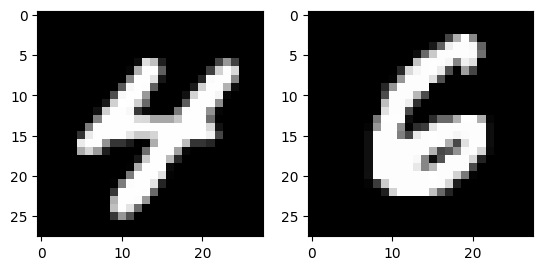

In [ ]:
# Hiển thị dữ liệu đầu vào
index = random.randint(0, 1000)
print(train_labels[index], test_labels[index])
train_image = np.asarray(read_image(train_images[index])).squeeze()
test_image = np.asarray(read_image(test_images[index])).squeeze()
plt.figure()
# Định nghĩa ma trận hiển thị có kích thước số hàng, số cột
f, axarr = plt.subplots(1, 2)
# Thêm các ảnh vào các vị trí axarr
axarr[0].imshow(train_image ,cmap='gray')
axarr[1].imshow(test_image, cmap='gray')
plt.show()

# PCA #


In [ ]:
images,labels = get_mnist_data(train_images_path, train_labels_path, 60000, shuffle=True)

## 2D

In [ ]:
# Khởi tạo mô hình PCA với số chiều 2
pca_2D = PCA(n_components=2)
# Reshape ảnh về dạng 2 chiều
images_2D = images.reshape(60000, -1)
images_pca_2D= pca_2D.fit_transform(images_2D/255.)
print(images_pca_2D.shape)


(60000, 2)


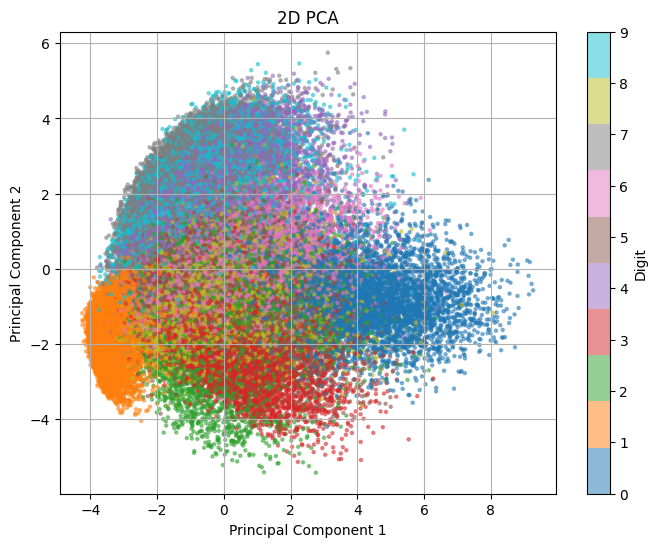

In [ ]:
# Vẽ biểu đồ 2D
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(images_pca_2D[:, 0], images_pca_2D[:, 1],c=labels, cmap='tab10', alpha=0.5,s=5)
plt.colorbar(label='Digit')
plt.title('2D PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

In [ ]:
U = pca_2D.components_.T
print(U.shape)

(784, 2)


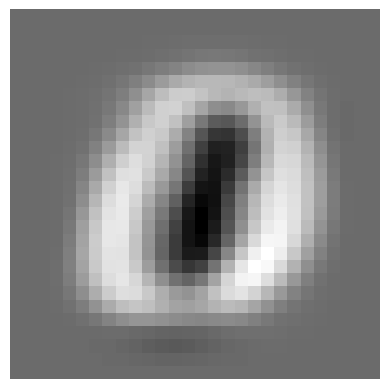

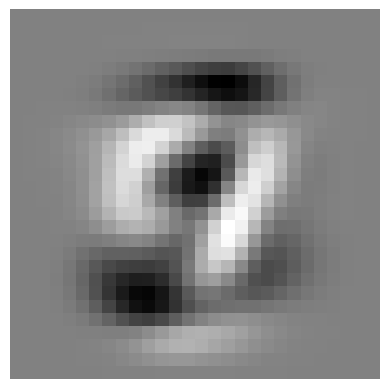

In [ ]:
# Trực quan hình ảnh thành phần chính
import matplotlib.pyplot as plt
for i in range(0,2):
    plt.axis('off')
    f1 = plt.imshow(U[:, i].reshape(28, 28), interpolation='nearest')
    f1.axes.get_xaxis().set_visible(False)
    f1.axes.get_yaxis().set_visible(False)
    # f2 = plt.imshow(, interpolation='nearest' )
    plt.gray()
    fn = 'eigennum' + str(i).zfill(2) + '.png'
    # plt.savefig(fn, bbox_inches='tight', pad_inches=0)
    plt.show()

## 3D

In [ ]:
# Khởi tạo mô hình PCA với số chiều 3
pca_3D = PCA(n_components=3)

images_pca_3D = pca_3D.fit_transform(images/255.)
print(images_pca_3D.shape)


(60000, 3)


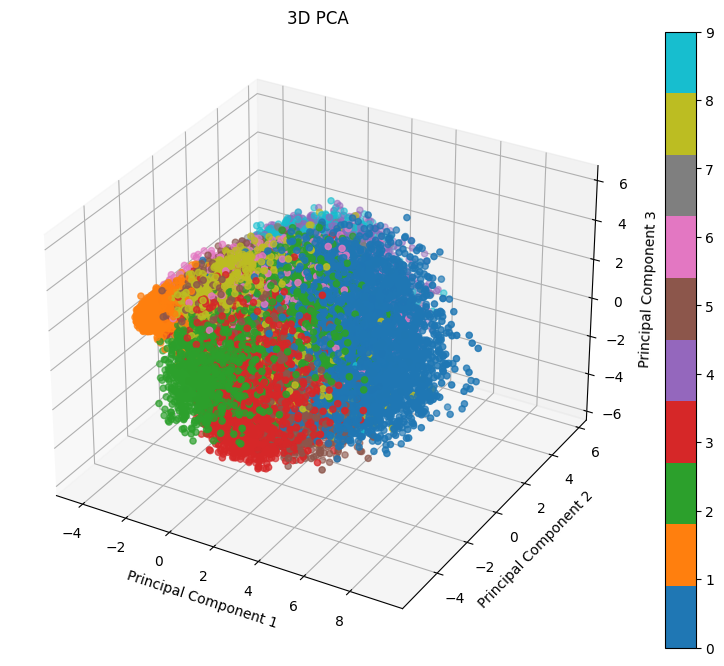

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
# Vẽ biểu đồ 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(images_pca_3D[:, 0], images_pca_3D[:, 1], images_pca_3D[:, 2], c=labels, cmap='tab10')
ax.set_title('3D PCA')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
cbar = fig.colorbar(scatter, ax=ax)
plt.show()

In [ ]:
U = pca_3D.components_.T
print(U.shape)

(784, 3)


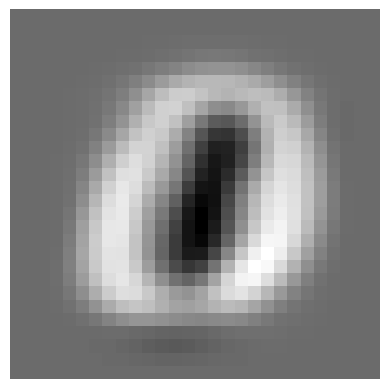

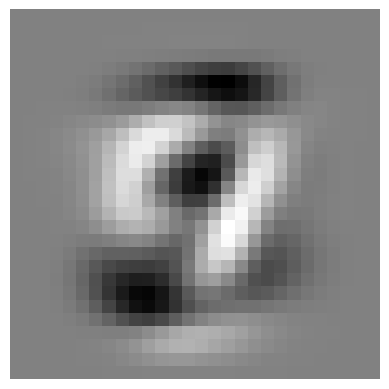

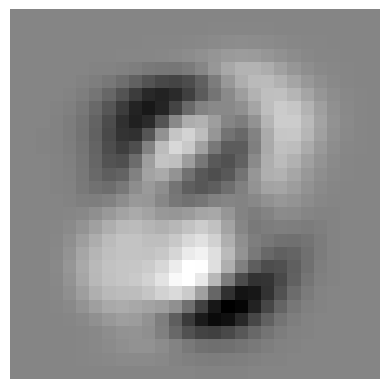

In [ ]:
# Trực quan hình ảnh thành phần chính
for i in range(0,3):
    plt.axis('off')
    f1 = plt.imshow(U[:, i].reshape(28, 28), interpolation='nearest')
    f1.axes.get_xaxis().set_visible(False)
    f1.axes.get_yaxis().set_visible(False)
    # f2 = plt.imshow(, interpolation='nearest' )
    plt.gray()
    fn = 'eigennum' + str(i).zfill(2) + '.png'
    # plt.savefig(fn, bbox_inches='tight', pad_inches=0)
    plt.show()

# Kmeans #

In [ ]:
images,labels = get_mnist_data(train_images_path, train_labels_path, 5000, shuffle=True)

## Định nghĩa các hàm

In [ ]:
# # Hàm này trực quan hóa các bộ lọc trong ma trận A. Mỗi cột của A đại diện cho một bộ lọc.
# # Chúng ta sẽ reshape mỗi cột thành một hình vuông và hiển thị trên mỗi ô của bảng trực quan.

# # Các tham số khác không bắt buộc, thông thường bạn không cần quan tâm đến chúng.

# # opt_normalize: xác định liệu chúng ta cần chuẩn hóa bộ lọc để tất cả chúng có độ tương phản tương tự hay không.
# # Giá trị mặc định là True.

# # opt_graycolor: xác định liệu chúng ta sử dụng màu xám làm bản đồ nhiệt hay không. Giá trị mặc định là True.

# # opt_colmajor: cho phép chuyển đổi thứ tự cột cho A. Trong trường hợp này, mỗi dòng của A đại diện cho một bộ lọc.
# # Giá trị mặc định là False
def display_network(A, m = -1, n = -1):
    opt_normalize = True
    opt_graycolor = True
    # Rescale
    A = A - np.average(A)
    # Compute rows & cols
    (row, col) = A.shape
    sz = int(np.ceil(np.sqrt(row)))
    buf = 1

    if m < 0 or n < 0:
        n = np.ceil(np.sqrt(col))
        m = np.ceil(col / n)

    image = np.ones(shape=(buf + m * (sz + buf), buf + n * (sz + buf)))
    if not opt_graycolor:
        image *= 0.1
    k = 0
    for i in range(int(m)):
        for j in range(int(n)):
            if k >= col:
                continue
            clim = np.max(np.abs(A[:, k]))
            if opt_normalize:
                image[buf + i * (sz + buf):buf + i * (sz + buf) + sz, buf + j * (sz +
                buf):buf + j * (sz + buf) + sz] = \
                A[:, k].reshape(sz, sz) / clim
            else:
                image[buf + i * (sz + buf):buf + i * (sz + buf) + sz, buf + j * (sz +
                buf):buf + j * (sz + buf) + sz] = \
                A[:, k].reshape(sz, sz) / np.max(np.abs(A))
            k += 1
    return image


# #Khởi tạo một bộ tâm cụm trên dữ liệu X với giải thiết có k cụm
def kmeans_init_centers(X, k):
    # Chọn ngẫu nhiên k hàng X làm tâm ban đầu
    return X[np.random.choice(X.shape[0], k, replace=False)]

# # Phương thức để gán cụm cho một điểm dữ liệu bằng cách tính khoảng cách từ điểm đó đến các tâm cụm,
# # khoảng cách đến đâu ngắn nhất thì ta coi điểm hiện tại sẽ thuộc về cụm đó.

def kmeans_assign_labels(X, centers):
    #tính toán khoảng cách theo cặp btw dữ liệu và trung tâm
    D = cdist(X, centers)
    #Return chỉ mục của trung tâm gần nhất
    return np.argmin(D, axis=1)

# # Phương thức để cập nhật lại tâm cụm sau mỗi bước lặp: Tâm cụm mới sẽ là trung bình cộng (theo tọa độ)
# # của tất cả các điểm có trong cụm.
def kmeans_update_centers(X, labels, K):
    centers = np.zeros((K, X.shape[1]))
    for k in range(K):
        # thu thập tất cả các điểm được gán cho cụm thứ k
        Xk = X[labels == k, :]
        #Lấy trung bình
        centers[k, :] = np.mean(Xk, axis=0)
    return centers

# # """
# # Hàm để kiểm tra xem thuật toán có thực sự chạy (có hội tụ hay không) thông qua việc tâm cụm sau mỗi bước
# # lặp có thay đổi hay không? Nếu tâm cụm không đổi nghĩa là thuật toán đã dừng (hội tụ) – tức là cần trả về
# # TRUE. Kiểm tra cho tất cả các tâm cụm
# # """
def has_converged(centers, new_centers):
    #trả về True nếu hai tập trung tâm giống nhau
    return (set([tuple(a) for a in centers]) == set([tuple(a) for a in new_centers]))

#Vòng lặp để thực hiện tất cả các bước trong thuật toán k-means cho đến khi thuật toán dừng
def kmeans(X, K):
    centers = [kmeans_init_centers(X, K)]
    labels = []
    it = 0
    while True:
        labels.append(kmeans_assign_labels(X, centers[-1]))
        new_centers = kmeans_update_centers(X, labels[-1], K)
        if has_converged(centers[-1], new_centers):
            break
        centers.append(new_centers)
        it += 1
    return (centers, labels, it)

In [ ]:
# Trực quan dữ liệu sử dụng thuật toán trên
X = images.reshape((images.shape[0], -1))
X0 = X[:5000,:]/255.0
X = X0
K = 10
(centers, labels, it) = kmeans(X, K)
print('Centers found by our algorithm:')
print(centers[-1][0][100])
print(labels[-1])
print(len(labels[-1]))

Centers found by our algorithm:
0.019566060823111586
[7 0 9 ... 0 5 6]
5000


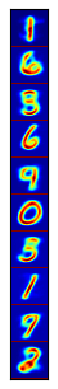

In [ ]:
# Sử dụng phương thức display_network hiển thị trực quan hoá các bộ lọc trong ma trận A
A = display_network(centers[-1].T, K, 1)
f1 = plt.imshow(A, interpolation='nearest', cmap="jet")
f1.axes.get_xaxis().set_visible(False)
f1.axes.get_yaxis().set_visible(False)
plt.show()

## Triển khai phân cụm dữ liệu

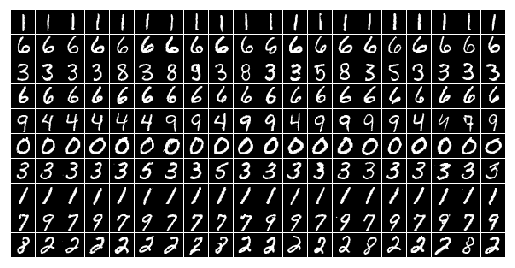

In [ ]:
# Hiển thị kết quả phân cụm khi ứng dụng thuật toán
N0 = 20
X1 = np.zeros((N0*K, 784))
for k in range(K):
    Xk = X0[labels[-1] == k, :]
    center_k = [centers[-1][k]]  # Convert center_k to a 2D array
    center_k = np.array(center_k)
    neigh = NearestNeighbors(n_neighbors=N0)
    neigh = neigh.fit(Xk)
    dist, nearest_id = neigh.kneighbors(center_k, N0)
    X1[N0*k: N0*k + N0,:] = Xk[nearest_id, :]

plt.axis('off')
A = display_network(X1.T, K, N0)
f2 = plt.imshow(A, interpolation='nearest',cmap = "jet")
plt.gray()
plt.show()

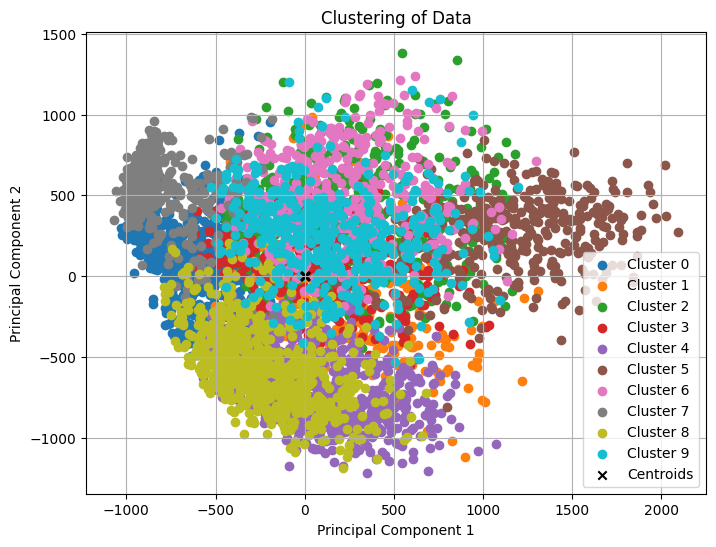

In [ ]:
images_pca = pca_2D.fit_transform(images)
combined_data = np.column_stack((images_pca[:, 0], images_pca[:, 1], labels[-1]))

plt.figure(figsize=(8, 6))
for i in range(K):
    cluster_data = combined_data[combined_data[:, -1] == i]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {i}')
plt.scatter(centers[-1][:, 0], centers[-1][:, 1], c='black', marker='x', label='Centroids')
plt.title('Clustering of Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()

# CNN

## Khởi tạo mô hình

In [ ]:
WIDTH = 28
HEIGHT = 28
CHANNELS = 1

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(
        filters=8,
        kernel_size=2,
        activation='relu',
        input_shape=(WIDTH, HEIGHT, CHANNELS),
    ),
    tf.keras.layers.MaxPooling2D(
        pool_size=(2, 2),
        strides=(2, 2)
    ),
    tf.keras.layers.Conv2D(
        filters=16,
        kernel_size=2,
        activation='relu',
    ),
    tf.keras.layers.MaxPooling2D(
        pool_size=(2, 2),
        strides=(2, 2)
    ),
    tf.keras.layers.Conv2D(
        filters=32,
        kernel_size=2,
        strides=1,
        activation='relu',
    ),
    tf.keras.layers.MaxPooling2D(
        pool_size=(2, 2),
        strides=(2, 2)
    ),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(
        units=128,
        activation='relu'
    ),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(
        units=10,
        activation='softmax',
    )
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 27, 27, 8)         40        
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 8)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 16)        528       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 16)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 5, 5, 32)          2080      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 2, 2, 32)          0

In [ ]:
model.compile(optimizer='adam',
loss='sparse_categorical_crossentropy',
metrics = ['accuracy'])
# sparse_categorical_crossentropy được sử dụng khi tập Y là các số nguyên

## Thiết lập dữ liệu

In [ ]:
# Lấy dữ liệu từ tập train-labels-idx1-ubyte và train-images-idx3-ubyte với kích thước mỗi tập là 60000
train_images, train_labels = get_mnist_data(train_images_path, train_labels_path, 60000, shuffle=True)

In [ ]:
# Chia dữ liệu thành 2 tập train và validation
X_train, X_val, y_train, y_val = train_test_split(train_images,train_labels, test_size=0.3, random_state=42)
# Reshape về dạng 4 chiều
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_train = X_train.astype('float32') / 255 # Chuẩn hoá pixel về [0,1]
print(X_train.shape)

X_val = X_val.reshape((X_val.shape[0], 28, 28, 1))
X_val = X_val.astype('float32') / 255
print(X_val.shape)

print(y_train.shape)
print(len(y_train))

(42000, 28, 28, 1)
(18000, 28, 28, 1)
(42000,)
42000


## Huấn luyện mô hình

In [ ]:
import time
start = time.time()
history = model.fit(X_train,y_train,epochs=15, batch_size=100,validation_data=(X_val,y_val), verbose=1)
end = time.time()
print("Time: ",end - start)


Epoch 1/15
420/420 [==============================] - 8s 5ms/step - loss: 0.6487 - accuracy: 0.7981 - val_loss: 0.2089 - val_accuracy: 0.9341
Epoch 2/15
420/420 [==============================] - 2s 5ms/step - loss: 0.1909 - accuracy: 0.9400 - val_loss: 0.1365 - val_accuracy: 0.9567
Epoch 3/15
420/420 [==============================] - 2s 5ms/step - loss: 0.1364 - accuracy: 0.9592 - val_loss: 0.1078 - val_accuracy: 0.9653
Epoch 4/15
420/420 [==============================] - 2s 5ms/step - loss: 0.1110 - accuracy: 0.9639 - val_loss: 0.1059 - val_accuracy: 0.9674
Epoch 5/15
420/420 [==============================] - 3s 6ms/step - loss: 0.0926 - accuracy: 0.9701 - val_loss: 0.0882 - val_accuracy: 0.9731
Epoch 6/15
420/420 [==============================] - 2s 5ms/step - loss: 0.0831 - accuracy: 0.9740 - val_loss: 0.0778 - val_accuracy: 0.9753
Epoch 7/15
420/420 [==============================] - 2s 5ms/step - loss: 0.0743 - accuracy: 0.9760 - val_loss: 0.0749 - val_accuracy: 0.9758
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


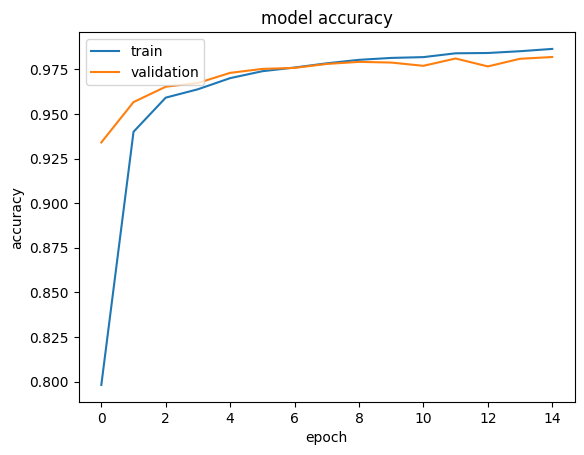

In [ ]:
# Đưa ra danh sách các keys trong history
print(history.history.keys())
# Tổng hợp lịch sử quá trình huấn luyện cho độ đo accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
# plt.savefig('/content/drive/MyDrive/Accuracy.png')
plt.show()
print()
# Tổng hợp lịch sử quá trình huấn luyện cho độ đo loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
# plt.savefig('/content/drive/MyDrive/Loss.png')
plt.show()

## Đánh giá mô hình trên tập validation

In [ ]:
val_pred = np.argmax(model.predict(X_val), axis=1)
print(val_pred.shape)
print(classification_report(y_val, val_pred))

563/563 [==============================] - 2s 3ms/step
(18000,)
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1841
           1       0.99      0.99      0.99      2028
           2       0.98      0.97      0.98      1784
           3       0.98      0.98      0.98      1838
           4       0.98      0.99      0.98      1746
           5       0.99      0.98      0.99      1626
           6       0.98      0.99      0.99      1775
           7       0.98      0.98      0.98      1876
           8       0.98      0.96      0.97      1744
           9       0.97      0.98      0.98      1742

    accuracy                           0.98     18000
   macro avg       0.98      0.98      0.98     18000
weighted avg       0.98      0.98      0.98     18000



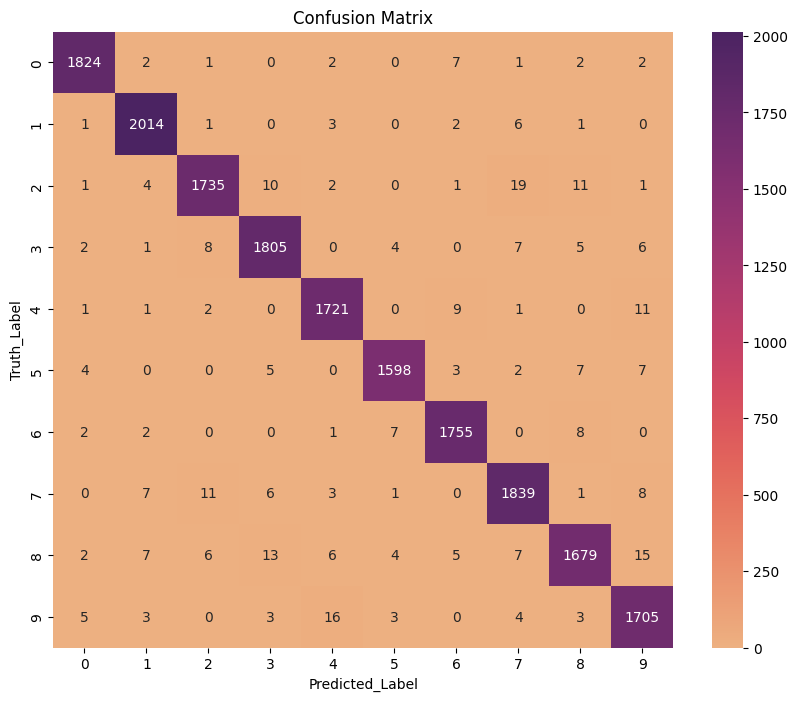

In [ ]:
# Trực quan kết quả sử dụng confusion matrix
cm = confusion_matrix(y_val, val_pred)

plt.figure(figsize = (10,8))

sn.heatmap(cm, annot=True, cmap= 'flare',  fmt='d', cbar=True)
plt.xlabel('Predicted_Label')
plt.ylabel('Truth_Label')
plt.title('Confusion Matrix')
# plt.savefig('/content/drive/MyDrive/ConfusionMatrix.png')